In [1]:
import sys
import os

# Add the directory containing instruments.py to the Python path
custom_module_path = "/home/rebeccaz/Github/vampires_calibration"
sys.path.append(custom_module_path)

import plotting_rewrite as plotting

h5_file_path = "/home/rebeccaz/Github/vampires_calibration/mcmc/675nm_no_IMR_offset_with_dichroic_uniform_priors.h5"
txt_file_path = "/home/rebeccaz/Github/vampires_calibration/scipy_minimize/data_files/produced/675-50nm_no_IMR_offset_or_IMR_and_HWP_constraints.txt"


Chain shape (nsteps, nwalkers, ndim): (40000, 62, 12)


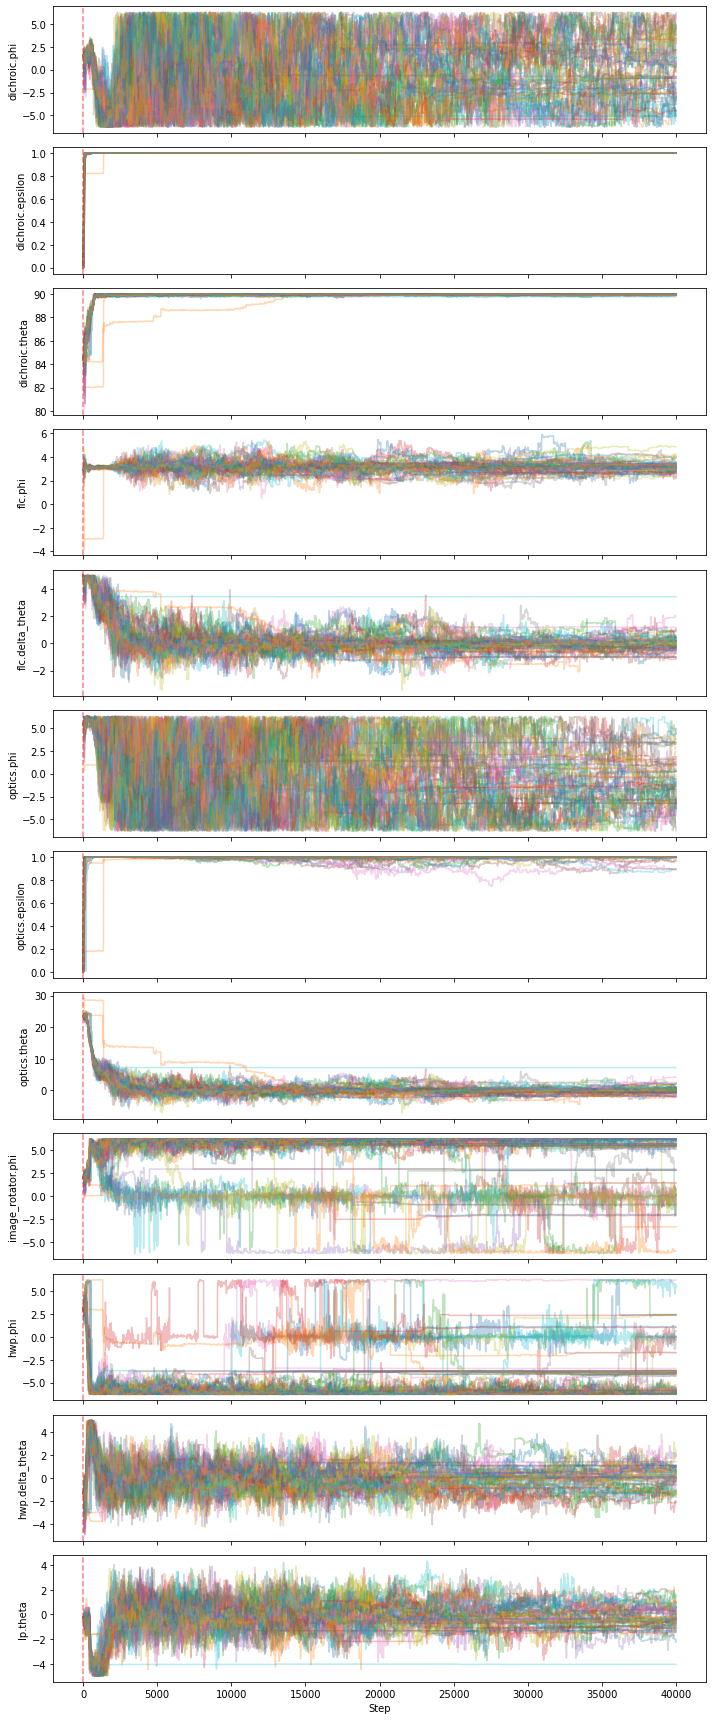

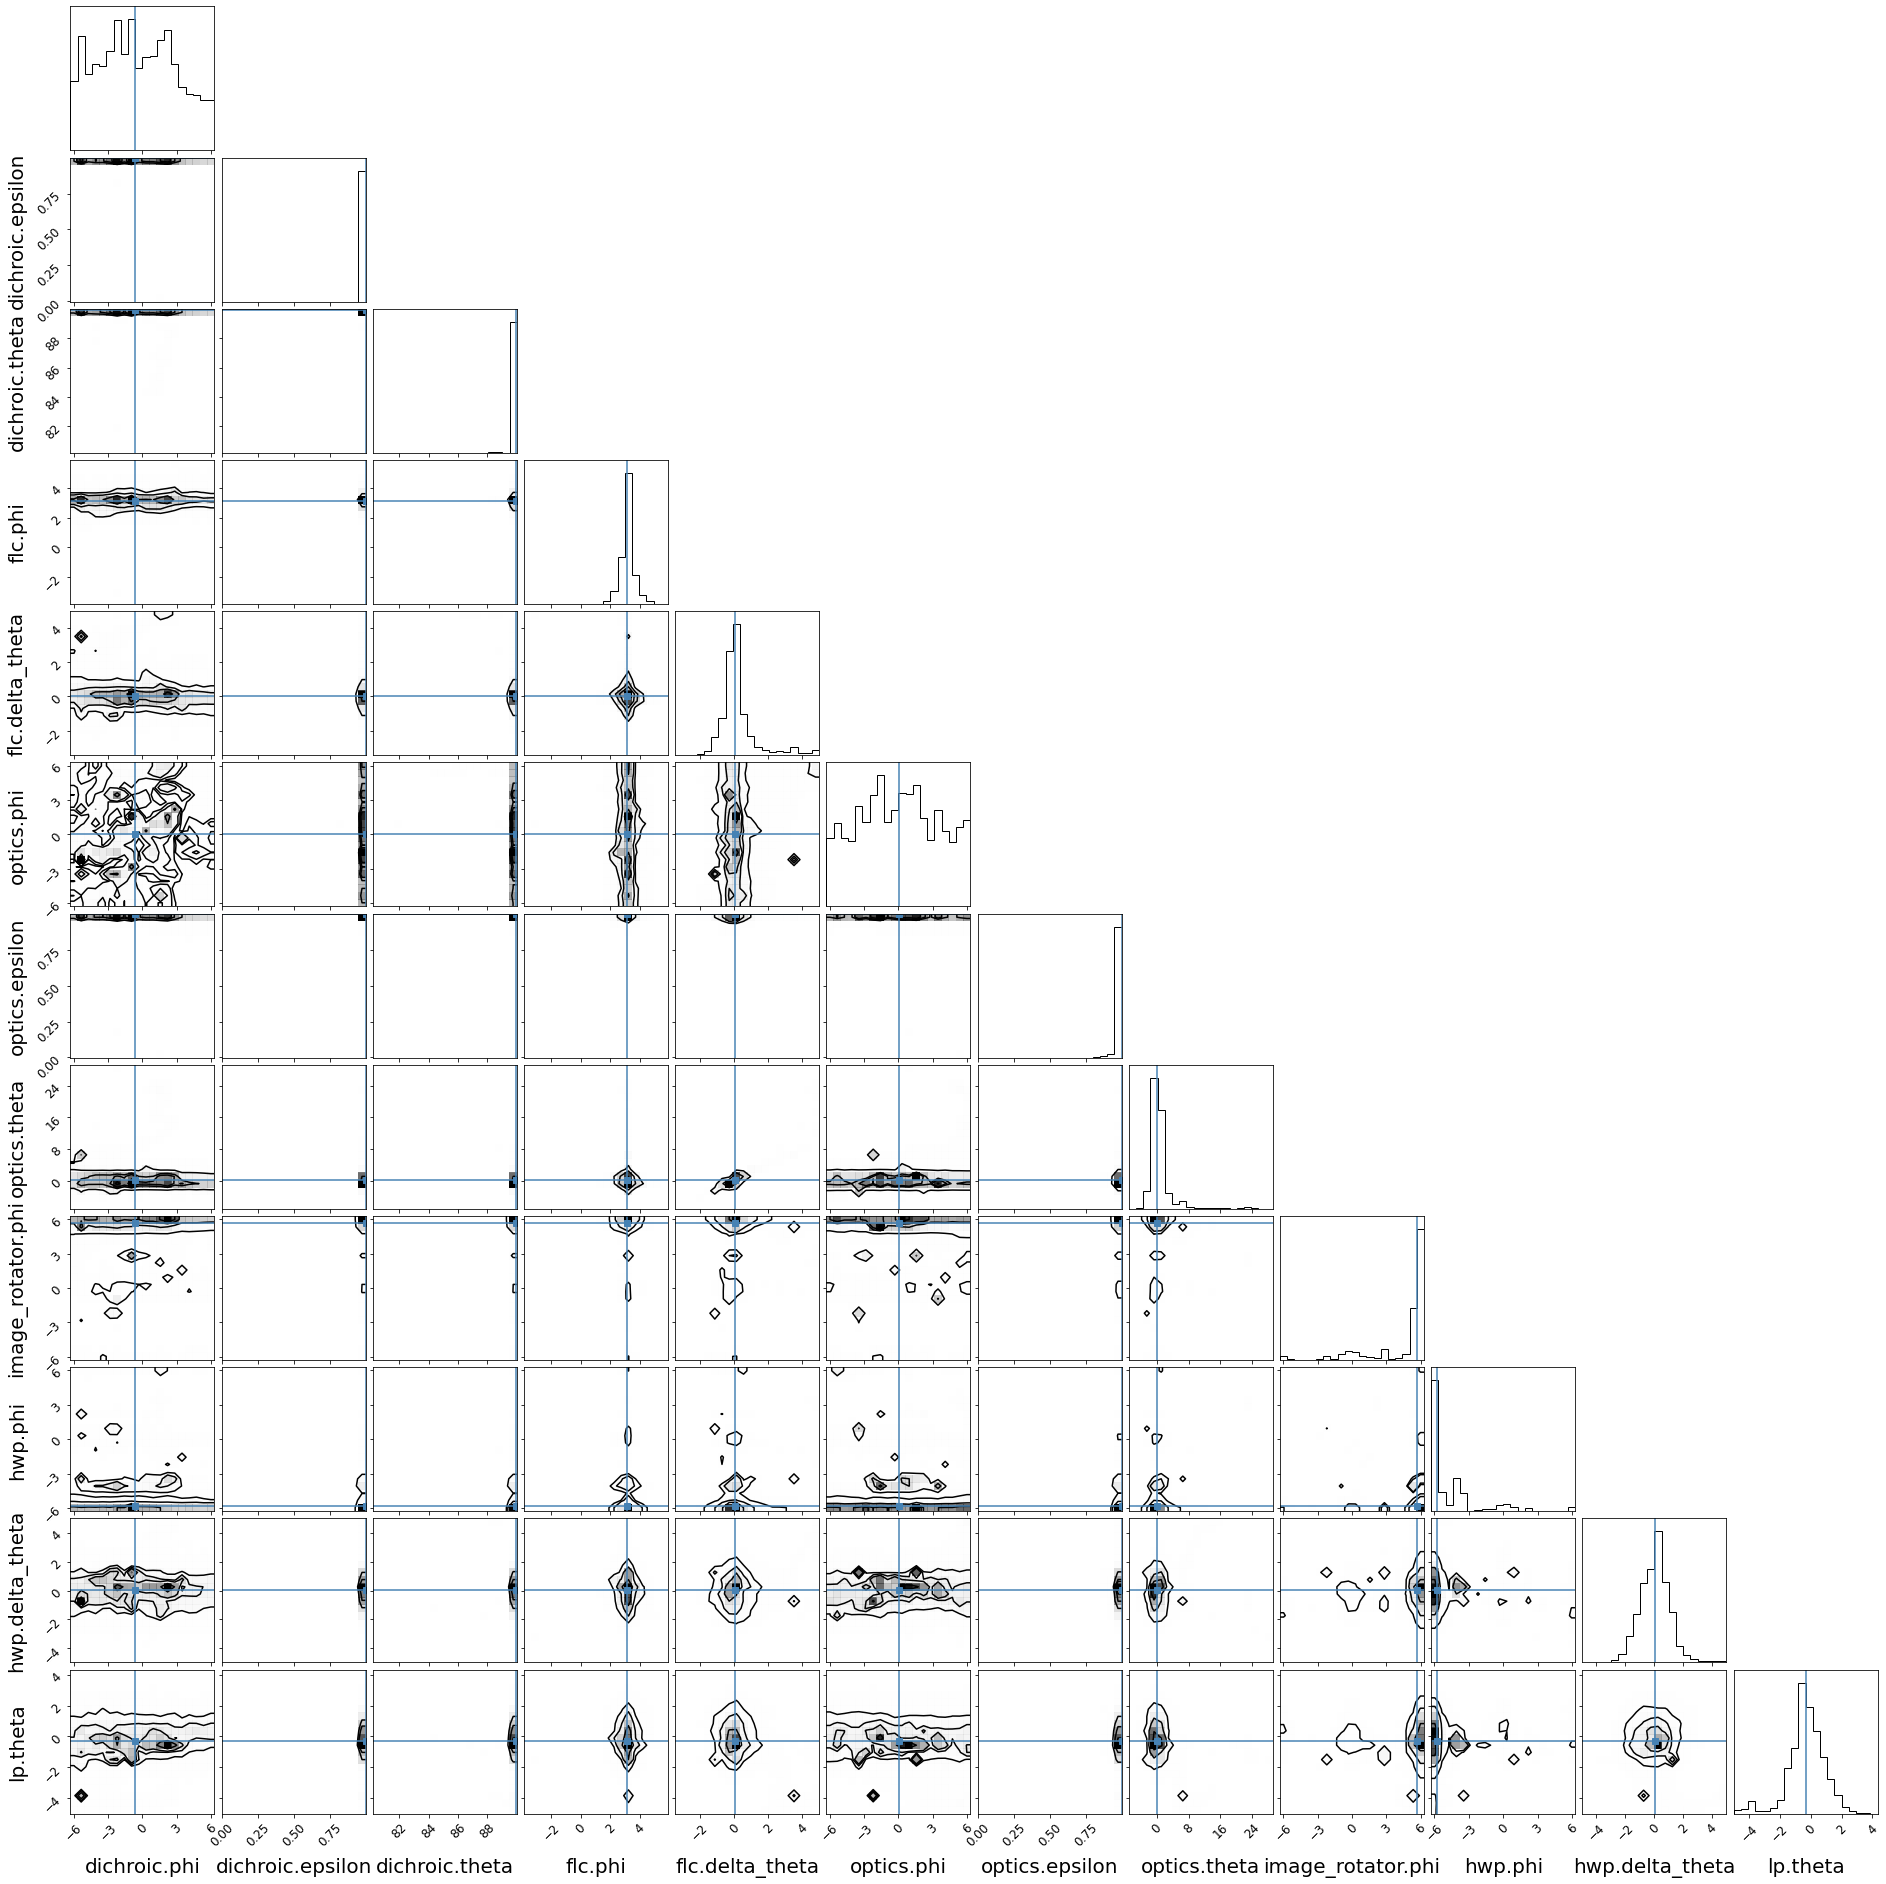

dichroic.phi: -0.68818 ± 3.29431
dichroic.epsilon: 0.99999 ± 0.03429
dichroic.theta: 89.94445 ± 0.51290
flc.phi: 3.14129 ± 0.48036
flc.delta_theta: 0.03191 ± 1.09137
optics.phi: 0.03769 ± 3.39858
optics.epsilon: 0.99974 ± 0.04120
optics.theta: 0.12308 ± 3.22472
image_rotator.phi: 5.70649 ± 2.73489
hwp.phi: -5.79113 ± 2.62946
hwp.delta_theta: 0.05897 ± 1.04755
lp.theta: -0.29649 ± 1.21249


In [2]:
chain, names = plotting.load_chain_and_labels(h5_file_path, txt_file_path)
burn_in = 0

# Optional: Check chain shape after loading
print("Chain shape (nsteps, nwalkers, ndim):", chain.shape)

# Plot trace plots for MCMC chains
plotting.plot_trace(chain, names, burn_in=burn_in, max_walkers=100)

# Plot corner plot from flattened chain
plotting.plot_corner_flat(chain, names, burn_in=burn_in)

# Print median ± std for each parameter
plotting.summarize_posteriors(chain, names, burn_in=burn_in)


# Plotting Random Chains for Fitting 

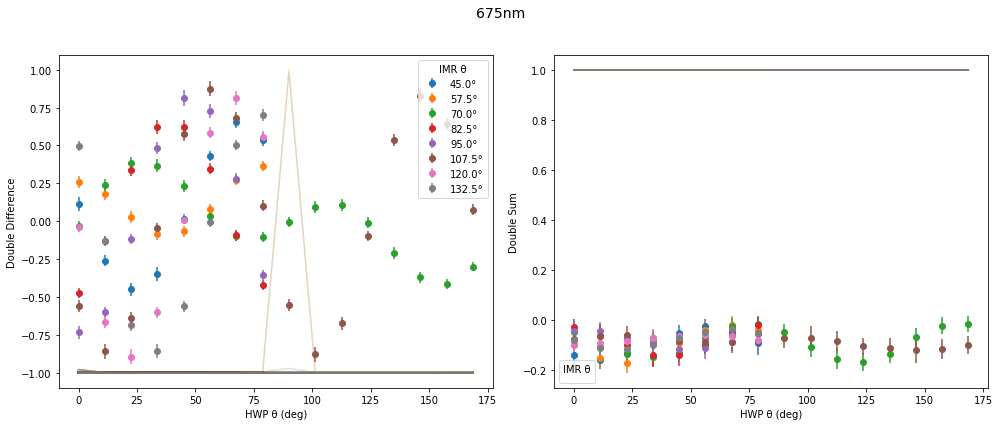

In [3]:
import sys
import os

# Add the directory containing instruments.py to the Python path
custom_module_path = "/home/rebeccaz/Github/vampires_calibration"
sys.path.append(custom_module_path)

import plotting_rewrite as plotting
import numpy as np

# Define the system configuration dictionary
system_dict = {
    "components": {
        "wollaston": {
            "type": "wollaston_prism_function",
            "properties": {"beam": "o", "transmission_ratio": 1.18},
        },
        "dichroic": {
            "type": "diattenuator_retarder_function",
            "properties": {"phi": 0, "epsilon": 0, "theta": 0},
        },
        "flc": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5 * 2 * np.pi, "theta": 0, "delta_theta": 0},
        },
        "optics": {
            "type": "diattenuator_retarder_function",
            "properties": {"phi": 0, "epsilon": 0, "theta": 0},
        },
        "image_rotator": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5 * 2 * np.pi, "theta": 0, "delta_theta": 0},
        },
        "hwp": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5, "theta": 0, "delta_theta": 0},
        },
        "lp": {
            "type": "general_linear_polarizer_function_with_theta",
            "properties": {"theta": 0},
        },
    }
}

# Input paths and call plotting function
h5_filename = "675nm_no_IMR_offset_with_dichroic_uniform_priors.h5"
txt_filename = "675-50nm.txt"
csv_file_path = "/home/rebeccaz/Github/vampires_calibration/data/20230914_processed_table.csv"

plotting.plot_mcmc_fits_double_diff_sum(
    h5_filename=h5_filename,
    txt_filename=txt_filename,
    csv_path=csv_file_path,
    filter_wavelength="675-50",
    system_dict=system_dict,
    wavelength_str="675nm",
    n_samples=50,
    burn_in=1000
)
